In [1]:
# importing libraries

import os
import pandas as pd
import numpy as np
from math import sqrt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

#All necessary plotly libraries
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# stats tools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Arima Model
from pmdarima.arima import auto_arima

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# LSTM

from tensorflow import keras
from tensorflow.keras.layers import Dense,LSTM,Dropout,Flatten
from tensorflow.keras import Sequential

# GARCH
from arch import arch_model
from arch.__future__ import reindexing

In [2]:
df = pd.read_csv("Netflix Stock.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,7.931429,7.961429,7.565714,7.640000,17239600,0.0,0.0
1,2010-01-05 00:00:00-05:00,7.652857,7.657143,7.258571,7.358571,23753100,0.0,0.0
2,2010-01-06 00:00:00-05:00,7.361429,7.672857,7.197143,7.617143,23290400,0.0,0.0
3,2010-01-07 00:00:00-05:00,7.731429,7.757143,7.462857,7.485714,9955400,0.0,0.0
4,2010-01-08 00:00:00-05:00,7.498571,7.742857,7.465714,7.614286,8180900,0.0,0.0


In [3]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          3522 non-null   datetime64[ns, UTC]
 1   Open          3522 non-null   float64            
 2   High          3522 non-null   float64            
 3   Low           3522 non-null   float64            
 4   Close         3522 non-null   float64            
 5   Volume        3522 non-null   int64              
 6   Dividends     3522 non-null   float64            
 7   Stock Splits  3522 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 220.3 KB


In [5]:
df = df.set_index(df['Date']).sort_index()

In [6]:
df['Return'] = 100 * (df['Close'].pct_change())

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return
Date,,,,,,,,,
2010-01-04 05:00:00+00:00,2010-01-04 05:00:00+00:00,7.931429,7.961429,7.565714,7.640000,17239600,0.0,0.0,NaN
2010-01-05 05:00:00+00:00,2010-01-05 05:00:00+00:00,7.652857,7.657143,7.258571,7.358571,23753100,0.0,0.0,-3.683623
2010-01-06 05:00:00+00:00,2010-01-06 05:00:00+00:00,7.361429,7.672857,7.197143,7.617143,23290400,0.0,0.0,3.513890
2010-01-07 05:00:00+00:00,2010-01-07 05:00:00+00:00,7.731429,7.757143,7.462857,7.485714,9955400,0.0,0.0,-1.725439
2010-01-08 05:00:00+00:00,2010-01-08 05:00:00+00:00,7.498571,7.742857,7.465714,7.614286,8180900,0.0,0.0,1.717565


In [8]:
df.dropna(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return
Date,,,,,,,,,
2010-01-05 05:00:00+00:00,2010-01-05 05:00:00+00:00,7.652857,7.657143,7.258571,7.358571,23753100,0.0,0.0,-3.683623
2010-01-06 05:00:00+00:00,2010-01-06 05:00:00+00:00,7.361429,7.672857,7.197143,7.617143,23290400,0.0,0.0,3.513890
2010-01-07 05:00:00+00:00,2010-01-07 05:00:00+00:00,7.731429,7.757143,7.462857,7.485714,9955400,0.0,0.0,-1.725439
2010-01-08 05:00:00+00:00,2010-01-08 05:00:00+00:00,7.498571,7.742857,7.465714,7.614286,8180900,0.0,0.0,1.717565
2010-01-11 05:00:00+00:00,2010-01-11 05:00:00+00:00,7.660000,7.704286,7.528571,7.604286,6783700,0.0,0.0,-0.131329


Text(0.5, 1.0, 'Daily Returns Over Time')

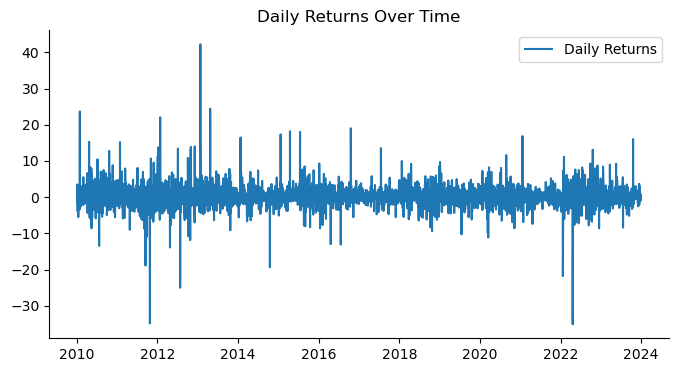

In [9]:
fig,ax = plt.subplots(figsize=(8,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(df['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')

## Volatility

* Daily
* Monthly
* Annaul

In [10]:
# Daily 
daily_volatility = df['Return'].std()

# Monthly
monthly_volatility = math.sqrt(21) * daily_volatility

# Annual
annual_volatility = math.sqrt(252) * daily_volatility

In [11]:
print(f'Daily: {daily_volatility:.2f}%, Monthly: {monthly_volatility:.2f}%, Annual: {annual_volatility:.2f}%')

Daily: 3.22%, Monthly: 14.76%, Annual: 51.13%


## GARCH Model

In [12]:
garch_model = arch_model(df['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

results = garch_model.fit()
print(results)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 993018.0797708444
Iteration:      2,   Func. Count:     14,   Neg. LLF: 24058.245468522342
Iteration:      3,   Func. Count:     23,   Neg. LLF: 9030.734386646385
Iteration:      4,   Func. Count:     29,   Neg. LLF: 9022.283598970855
Iteration:      5,   Func. Count:     35,   Neg. LLF: 11123.230218644452
Iteration:      6,   Func. Count:     41,   Neg. LLF: 292607.9673223775
Iteration:      7,   Func. Count:     47,   Neg. LLF: 9012.219467990471
Iteration:      8,   Func. Count:     53,   Neg. LLF: 9300.880806921537
Iteration:      9,   Func. Count:     59,   Neg. LLF: 9006.03828521596
Iteration:     10,   Func. Count:     65,   Neg. LLF: 8991.192074899594
Iteration:     11,   Func. Count:     71,   Neg. LLF: 8984.336888628619
Iteration:     12,   Func. Count:     77,   Neg. LLF: 8984.239778995252
Iteration:     13,   Func. Count:     83,   Neg. LLF: 8984.235611396594
Iteration:     14,   Func. Count:     88,   Neg. LLF: 8984.2356

### Rolling Predictions

Text(0.5, 1.0, 'Rolling Prediction')

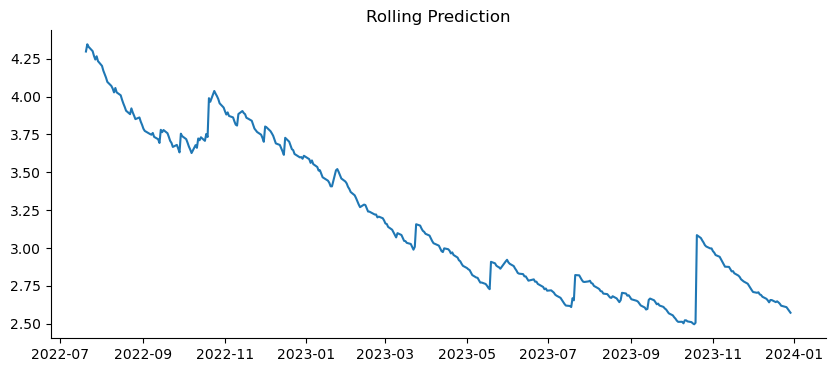

In [13]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = df['Return'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=df['Return'].index[-365:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')

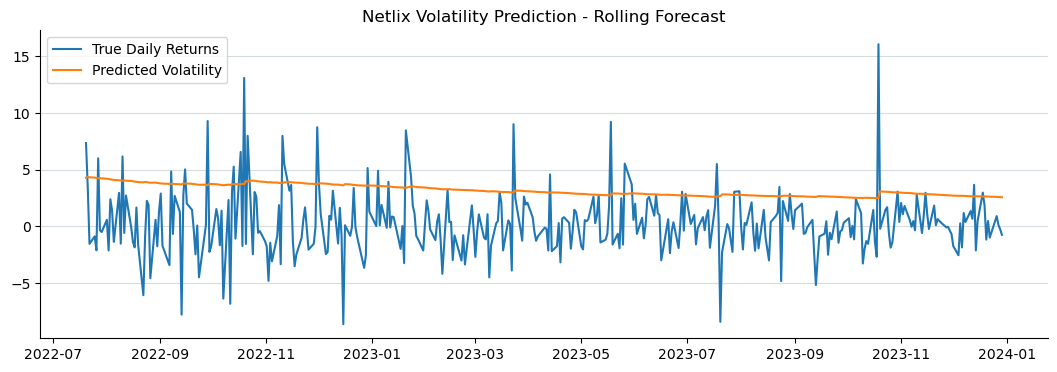

In [14]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)
plt.plot(df['Return'][-365:])
plt.plot(rolling_predictions)
plt.title('Netlix Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])

In [15]:
results = garch_model.fit(disp='off')
print(results.params)

mu          0.195146
omega       0.056397
alpha[1]    0.012193
beta[1]     0.982261
Name: params, dtype: float64
